In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
cmap = 'magma_r'

In [2]:
ds_tool = xr.open_dataset('fates_landuse_pft_map_new.nc')
ds_charlie = xr.open_dataset('/home/glemieux/Repos/Analysis/ckoven/clm_landusedata/charlie_regrid.nc')

In [3]:
ds_charlie = ds_charlie.rename({'latitude':'lat','longitude':'lon'})

In [4]:
ds_charlie

<xarray.Dataset>
Dimensions:     (natpft: 14, lon: 72, lat: 46)
Coordinates:
  * natpft      (natpft) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * lon         (lon) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat         (lat) float64 -90.0 -86.0 -82.0 -78.0 ... 78.0 82.0 86.0 90.0
Data variables:
    bareground  (lat, lon) float32 ...
    primary     (natpft, lat, lon) float32 ...
    range       (natpft, lat, lon) float32 ...
    pasture     (natpft, lat, lon) float32 ...
Attributes:
    regrid_method:  conservative_normed

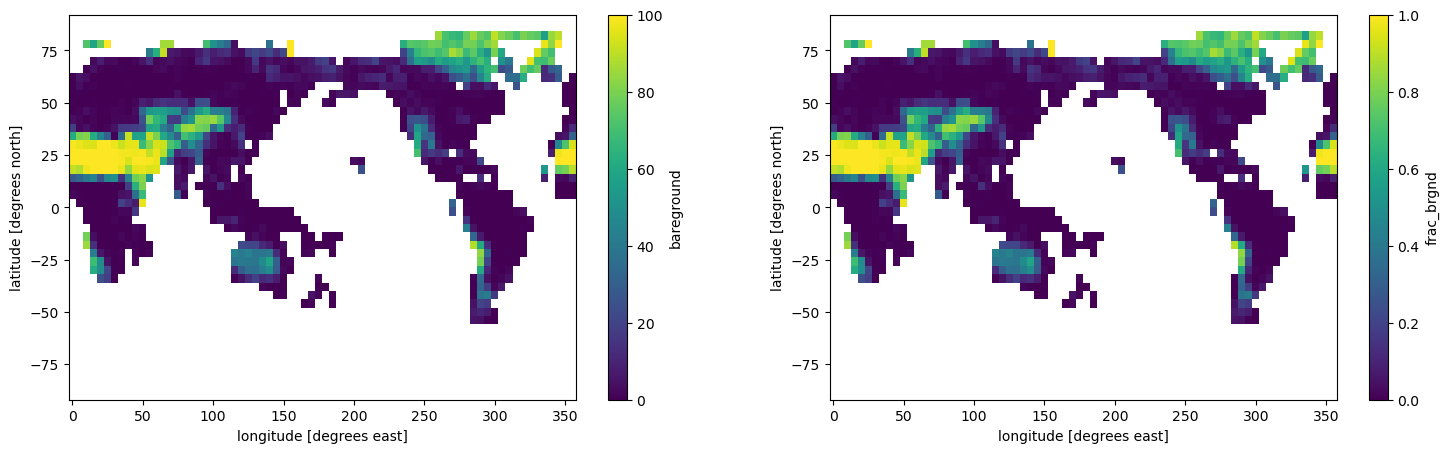

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
ds_charlie.bareground.plot(ax=ax[0])
ds_tool.frac_brgnd.plot(ax=ax[1])

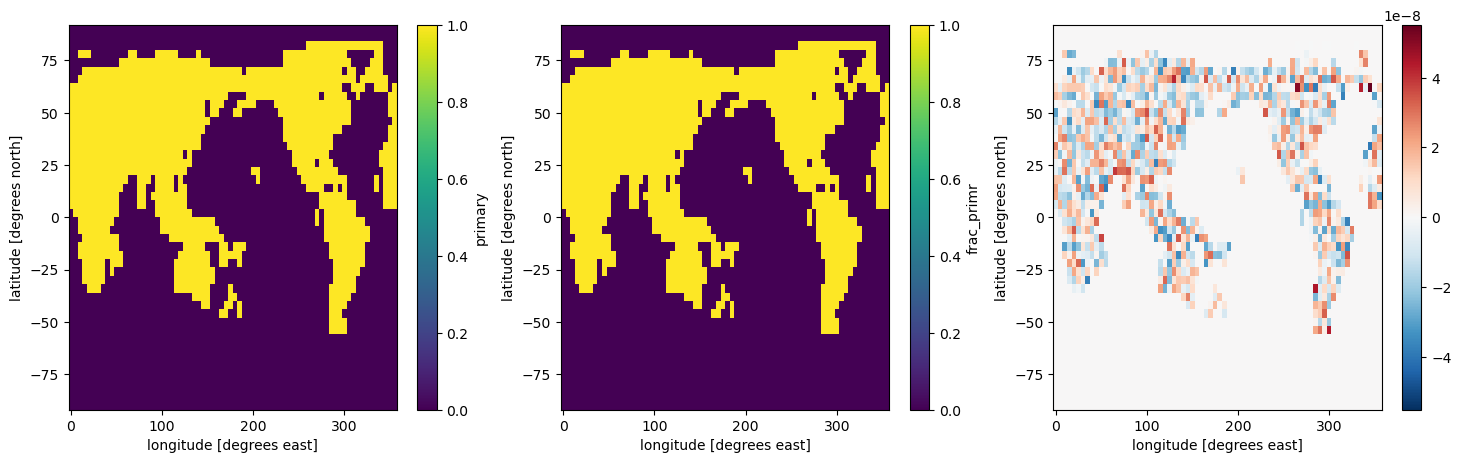

In [6]:
f, ax = plt.subplots(1, 3, figsize=(18, 5))
ds_charlie.primary.sum(dim='natpft').plot(ax=ax[0])
ds_tool.frac_primr.sum(dim='natpft').plot(ax=ax[1])
diff = ds_charlie.primary - ds_tool.frac_primr
diff.sum(dim='natpft').plot(ax=ax[2])

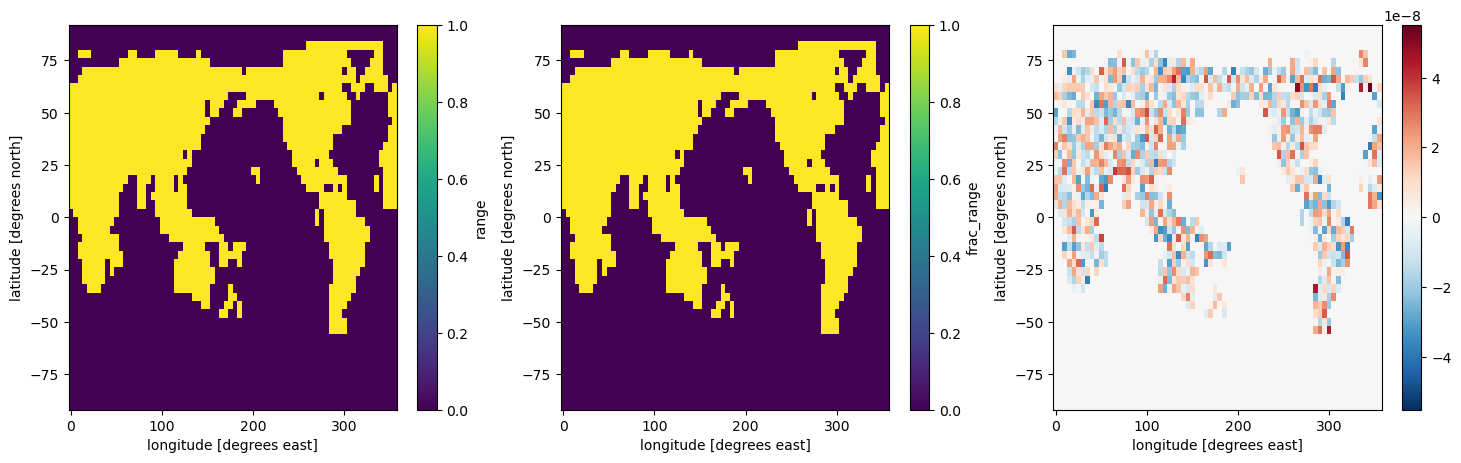

In [7]:
f, ax = plt.subplots(1, 3, figsize=(18, 5))
ds_charlie.range.sum(dim='natpft').plot(ax=ax[0])
ds_tool.frac_range.sum(dim='natpft').plot(ax=ax[1])
diff = ds_charlie.primary - ds_tool.frac_primr
diff.sum(dim='natpft').plot(ax=ax[2])